# **NLP Project: text generation (machine translation)**

**Preprocessing**

This code will prompt you to authorize access to your Google Drive. it imports the dataset directly from the Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Definition of the file path for the source (dataset of spanish sentences) and for the target (dataset of italian sentences)

In [7]:
import os
os.listdir('/content/drive/MyDrive/NLP/')


import shutil

# Define the source file path in your Google Drive
source_file_path = '/content/drive/MyDrive/NLP/WikiMatrix.es-it.es'
source_file_path_2 = '/content/drive/MyDrive/NLP/WikiMatrix.es-it.it'

# Define the destination file path in Colab
destination_file_path = '/content/WikiMatrix.es-it.es'  # You can specify a different name or path if needed
destination_file_path_2 = '/content/WikiMatrix.es-it.it'  # You can specify a different name or path if needed

# Copy the file from the source path to the destination path
shutil.copyfile(source_file_path, destination_file_path)
shutil.copyfile(source_file_path_2, destination_file_path_2)

'/content/WikiMatrix.es-it.it'

Installing OpenNMT library

In [ ]:
!pip install OpenNMT-py

Cloning GitHub repository with some python files that are necessary for tokenization and swobwarding

In [ ]:
# Create a directory and clone the Github MT-Preparation repository
!mkdir -p nmt
%cd nmt
!git clone https://github.com/ymoslem/MT-Preparation.git

In [ ]:
# Install the requirements
!pip3 install -r MT-Preparation/requirements.txt

**Tokenization and subwording**

DIfferentiation between source and target file

In [11]:
# Filter the dataset
# Arguments: source file, target file, source language, target language
!python3 MT-Preparation/filtering/filter.py /content/WikiMatrix.es-it.es /content/WikiMatrix.es-it.it es it

Dataframe shape (rows, columns): (671299, 2)
--- Rows with Empty Cells Deleted	--> Rows: 671298
--- Duplicates Deleted			--> Rows: 671298
--- Source-Copied Rows Deleted		--> Rows: 671292
--- Too Long Source/Target Deleted	--> Rows: 668310
--- HTML Removed			--> Rows: 668310
--- Rows will remain in true-cased	--> Rows: 668310
--- Rows with Empty Cells Deleted	--> Rows: 668310
--- Rows Shuffled			--> Rows: 668310
--- Source Saved: /content/WikiMatrix.es-it.es-filtered.es
--- Target Saved: /content/WikiMatrix.es-it.it-filtered.it


In [12]:
!ls MT-Preparation/subwording/

1-train_bpe.py	1-train_unigram.py  2-subword.py  3-desubword.py


In [13]:
# Train a SentencePiece model for subword tokenization
!python3 MT-Preparation/subwording/1-train_bpe.py /content/WikiMatrix.es-it.es-filtered.es /content/WikiMatrix.es-it.it-filtered.it

Output streaming troncato alle ultime 5000 righe.
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=155 size=17480 all=435935 active=22497 piece=ied
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=155 size=17500 all=436341 active=22903 piece=▁Musi
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=155 min_freq=49
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=155 size=17520 all=436386 active=21841 piece=formidad
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=155 size=17540 all=436405 active=21860 piece=▁renombrada
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=154 size=17560 all=436773 active=22228 piece=▁Inés
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=154 size=17580 all=436876 active=22331 piece=▁talla
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=154 size=17600 all=436910 active=22365 piece=▁armenios
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=154 min_freq=49
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=154 size=17620 all=436894

In [14]:
!ls

MT-Preparation	source.model  source.vocab  target.model  target.vocab


In [15]:
# Subword the dataset
!python3 MT-Preparation/subwording/2-subword.py source.model target.model /content/WikiMatrix.es-it.es-filtered.es /content/WikiMatrix.es-it.it-filtered.it

Source Model: source.model
Target Model: target.model
Source Dataset: /content/WikiMatrix.es-it.es-filtered.es
Target Dataset: /content/WikiMatrix.es-it.it-filtered.it
Done subwording the source file! Output: /content/WikiMatrix.es-it.es-filtered.es.subword
Done subwording the target file! Output: /content/WikiMatrix.es-it.it-filtered.it.subword


In [16]:
# First 3 lines before subwording
!head -n 3 /content/WikiMatrix.es-it.es-filtered.es && echo "-----" && head -n 3 /content/WikiMatrix.es-it.it-filtered.it


Aunque no existe un acuerdo universal sobre las fronteras de la región, una de las definiciones mayormente aceptadas de la misma incluyen a los estados estadounidenses de Oregón, Washington y la provincia canadiense de Columbia Británica. 
Mientras lo espiaba, Spider-Man 2099 descubre el plan de Sloan sobre viajar en el tiempo y establecer a Alchemax en los años pasados antes de su tiempo, permitiéndole reconstruir la empresa a su propia imagen y evitar que sus rivales de siempre se establezcan. 
Los libros que editaba la editorial no llegaban a los 1000 ejemplares. 
-----
Benché non esista una frontiera universalmente accettata, una definizione comune include gli stati statunitensi dell'Oregon e di Washington e la provincia canadese della Columbia Britannica. 
Spider-Man 2099, mentre spiava su di lui, scopre che Sloan intende tornare indietro nel tempo per stabilire l'Alchemax anni prima del suo tempo, permettendogli di ricostruire l'azienda a sua immagine e smantellare i suoi rivali 

In [17]:
# First 3 lines after subwording
!head -n 3 /content/WikiMatrix.es-it.es-filtered.es.subword && echo "---" && head -n 3 /content/WikiMatrix.es-it.it-filtered.it.subword

▁Aunque ▁no ▁existe ▁un ▁acuerdo ▁universal ▁sobre ▁las ▁fronteras ▁de ▁la ▁región , ▁una ▁de ▁las ▁definiciones ▁mayormente ▁aceptadas ▁de ▁la ▁misma ▁incluyen ▁a ▁los ▁estados ▁estadounidenses ▁de ▁Oregón , ▁Washington ▁y ▁la ▁provincia ▁canadiense ▁de ▁Columbia ▁Británica .
▁Mientras ▁lo ▁espi aba , ▁Spider - Man ▁ 2 0 9 9 ▁descubre ▁el ▁plan ▁de ▁Sloan ▁sobre ▁viajar ▁en ▁el ▁tiempo ▁y ▁establecer ▁a ▁Al che max ▁en ▁los ▁años ▁pasados ▁antes ▁de ▁su ▁tiempo , ▁permitiéndole ▁reconstruir ▁la ▁empresa ▁a ▁su ▁propia ▁imagen ▁y ▁evitar ▁que ▁sus ▁rivales ▁de ▁siempre ▁se ▁estable zcan .
▁Los ▁libros ▁que ▁edi taba ▁la ▁editorial ▁no ▁llegaban ▁a ▁los ▁ 1 0 0 0 ▁ejemplares .
---
▁Benché ▁non ▁esista ▁una ▁frontiera ▁universalmente ▁accettata , ▁una ▁definizione ▁comune ▁include ▁gli ▁stati ▁statunitensi ▁dell ' Oregon ▁e ▁di ▁Washington ▁e ▁la ▁provincia ▁canadese ▁della ▁Columbia ▁Britannica .
▁Spider - Man ▁ 2 0 9 9 , ▁mentre ▁spia va ▁su ▁di ▁lui , ▁scopre ▁che ▁Sloan ▁intende ▁tor

**Data splitting**

1. training dataset - used for training the model;
2. development dataset - used to run regular validations during the training to help improve the model parameters; and
3. testing dataset - a holdout dataset used after the model finishes training to finally evaluate the model on unseen data.

In [18]:
# Split the dataset into training set, development set, and test set
# Development and test sets should be between 1000 and 5000 segments (here we chose 2000)
!python3 MT-Preparation/train_dev_split/train_dev_test_split.py 2000 2000 /content/WikiMatrix.es-it.es-filtered.es.subword /content/WikiMatrix.es-it.it-filtered.it.subword

Dataframe shape: (668310, 2)
--- Empty Cells Deleted --> Rows: 668310
--- Wrote Files
Done!
Output files
/content/WikiMatrix.es-it.es-filtered.es.subword.train
/content/WikiMatrix.es-it.it-filtered.it.subword.train
/content/WikiMatrix.es-it.es-filtered.es.subword.dev
/content/WikiMatrix.es-it.it-filtered.it.subword.dev
/content/WikiMatrix.es-it.es-filtered.es.subword.test
/content/WikiMatrix.es-it.it-filtered.it.subword.test


In [20]:
# Check the first and last line from each dataset

# -------------------------------------------
# Change this cell to print your name
!echo -e "My name is: FirstName SecondName \n"
# -------------------------------------------

!echo "---First line---"
!head -n 1 {/content/WikiMatrix.es-it.es-filtered.es.subword.train,/content/WikiMatrix.es-it.es-filtered.es.subword.dev,/content/WikiMatrix.es-it.es-filtered.es.subword.test}

!echo -e "\n---Last line---"
!tail -n 1 {/content/WikiMatrix.es-it.it-filtered.it.subword.train,/content/WikiMatrix.es-it.it-filtered.it.subword.dev,/content/WikiMatrix.es-it.it-filtered.it.subword.test}

My name is: FirstName SecondName 

---First line---
==> /content/WikiMatrix.es-it.es-filtered.es.subword.train <==
▁Aunque ▁no ▁existe ▁un ▁acuerdo ▁universal ▁sobre ▁las ▁fronteras ▁de ▁la ▁región , ▁una ▁de ▁las ▁definiciones ▁mayormente ▁aceptadas ▁de ▁la ▁misma ▁incluyen ▁a ▁los ▁estados ▁estadounidenses ▁de ▁Oregón , ▁Washington ▁y ▁la ▁provincia ▁canadiense ▁de ▁Columbia ▁Británica .

==> /content/WikiMatrix.es-it.es-filtered.es.subword.dev <==
▁La ▁apuesta ▁del ▁centro .

==> /content/WikiMatrix.es-it.es-filtered.es.subword.test <==
▁Tang ▁& ▁F . T . W ang ▁( 1 9 5 1 ) ▁Ble tilla ▁fol iosa ▁( King ▁& ▁Pant l .)

---Last line---
==> /content/WikiMatrix.es-it.it-filtered.it.subword.train <==
▁Anche ▁Virgilio ▁Bo tella ▁( 2 0 0 2 ), ▁che ▁fece ▁parte ▁del ▁gruppo ▁che ▁aveva ▁in ▁carico ▁il ▁controllo ▁e ▁la ▁vigilanza ▁dell ' oro , ▁parla ▁di ▁ 1 3 . 0 0 0 ▁casse .

==> /content/WikiMatrix.es-it.it-filtered.it.subword.dev <==
▁È ▁stato ▁presentato ▁all ' Ele ctronic ▁Entertainment

Saving data on Drive

In [ ]:
# Copy your data to your Google Drive
!cp -R /content/nmt/ /content/drive/MyDrive/

^C


In [21]:
# Open the folder where you saved your prepapred datasets from the first exercise
# You might need to mount your Google Drive first
%cd /content/drive/MyDrive/nmt/
!ls

/content/drive/MyDrive/nmt
compute-bleu.py    config_ites.yaml  MT-Preparation  target.model
compute-bleu.py.1  config.yaml	     run	     target.vocab
compute-bleu.py.2  enja_ctranslate2  source.model    train.log
compute-bleu.py.3  models	     source.vocab


Creating the training configuration file with all necessary hyperparameters

In [ ]:
# Create the YAML configuration file
# On a regular machine, you can create it manually or with nano
# Note here we are using some smaller values because the dataset is small
# For larger datasets, consider increasing: train_steps, valid_steps, warmup_steps, save_checkpoint_steps, keep_checkpoint

config = '''# config.yaml


## Where the samples will be written
save_data: run

# Training files
data:
    corpus_1:
        path_src: /content/WikiMatrix.es-it.es-filtered.es.subword.train
        path_tgt: /content/WikiMatrix.es-it.it-filtered.it.subword.train
        transforms: [filtertoolong]
    valid:
        path_src: /content/WikiMatrix.es-it.es-filtered.es.subword.dev
        path_tgt: /content/WikiMatrix.es-it.it-filtered.it.subword.dev
        transforms: [filtertoolong]

# Vocabulary files, generated by onmt_build_vocab
src_vocab: run/source.vocab
tgt_vocab: run/target.vocab

# Vocabulary size - should be the same as in sentence piece (default: 50.000)
src_vocab_size: 50000
tgt_vocab_size: 50000

# Filter out source/target longer than n if [filtertoolong] enabled
src_seq_length: 150
src_seq_length: 150

# Tokenization options
src_subword_model: source.model
tgt_subword_model: target.model

# Where to save the log file and the output models/checkpoints
log_file: train.log
save_model: models/model.esit

# Stop training if it does not imporve after n validations
early_stopping: 20

# Default: 5000 - Save a model checkpoint for each n (default: 1000)
save_checkpoint_steps: 2500

# To save space, limit checkpoints to last n
# keep_checkpoint: 3

seed: 3435

# Default: 100000 - Train the model to max n steps
# Increase to 200000 or more for large datasets
# For fine-tuning, add up the required steps to the original steps
train_steps: 200000

# Default: 10000 - Run validation after n steps
valid_steps: 1000

# Default: 4000 - for large datasets, try up to 8000
warmup_steps: 1000
report_every: 100

# Number of GPUs, and IDs of GPUs
world_size: 1
gpu_ranks: [0]

# Batching
bucket_size: 262144
num_workers: 0  # Default: 2, set to 0 when RAM out of memory
batch_type: "tokens"
batch_size: 4096   # Tokens per batch, change when CUDA out of memory
valid_batch_size: 2048
max_generator_batches: 2
accum_count: [4]
accum_steps: [0]

# Optimization
model_dtype: "fp16"
optim: "adam"
learning_rate: 2
# warmup_steps: 8000
decay_method: "noam"
adam_beta2: 0.998
max_grad_norm: 0
label_smoothing: 0.1
param_init: 0
param_init_glorot: true
normalization: "tokens"

# Model
encoder_type: transformer
decoder_type: transformer
position_encoding: true
enc_layers: 6
dec_layers: 6
heads: 8
hidden_size: 512
word_vec_size: 512
transformer_ff: 2048
dropout_steps: [0]
dropout: [0.1]
attention_dropout: [0.1]
'''

with open("config.yaml", "w+") as config_yaml:
  config_yaml.write(config)

from italian to spanish


In [ ]:
# Create the YAML configuration file
# On a regular machine, you can create it manually or with nano
# Note here we are using some smaller values because the dataset is small
# For larger datasets, consider increasing: train_steps, valid_steps, warmup_steps, save_checkpoint_steps, keep_checkpoint

config = '''# config_ites.yaml


## Where the samples will be written
save_data: run

# Training files
data:
    corpus_1:
        path_src: /content/WikiMatrix.es-it.it-filtered.it.subword.train
        path_tgt: /content/WikiMatrix.es-it.es-filtered.es.subword.train
        transforms: [filtertoolong]
    valid:
        path_src: /content/WikiMatrix.es-it.it-filtered.it.subword.dev
        path_tgt: /content/WikiMatrix.es-it.es-filtered.es.subword.dev
        transforms: [filtertoolong]

# Vocabulary files, generated by onmt_build_vocab
src_vocab: run/source.vocab
tgt_vocab: run/target.vocab

# Vocabulary size - should be the same as in sentence piece (default: 50.000)
src_vocab_size: 50000
tgt_vocab_size: 50000

# Filter out source/target longer than n if [filtertoolong] enabled
src_seq_length: 150
src_seq_length: 150

# Tokenization options
src_subword_model: source.model
tgt_subword_model: target.model

# Where to save the log file and the output models/checkpoints
log_file: train.log
save_model: models/model.ites

# Stop training if it does not imporve after n validations
early_stopping: 20

# Default: 5000 - Save a model checkpoint for each n (default: 1000)
save_checkpoint_steps: 2500

# To save space, limit checkpoints to last n
# keep_checkpoint: 3

seed: 3435

# Default: 100000 - Train the model to max n steps
# Increase to 200000 or more for large datasets
# For fine-tuning, add up the required steps to the original steps
train_steps: 200000

# Default: 10000 - Run validation after n steps
valid_steps: 1000

# Default: 4000 - for large datasets, try up to 8000
warmup_steps: 1000
report_every: 100

# Number of GPUs, and IDs of GPUs
world_size: 1
gpu_ranks: [0]

# Batching
bucket_size: 262144
num_workers: 0  # Default: 2, set to 0 when RAM out of memory
batch_type: "tokens"
batch_size: 4096   # Tokens per batch, change when CUDA out of memory
valid_batch_size: 2048
max_generator_batches: 2
accum_count: [4]
accum_steps: [0]

# Optimization
model_dtype: "fp16"
optim: "adam"
learning_rate: 2
# warmup_steps: 8000
decay_method: "noam"
adam_beta2: 0.998
max_grad_norm: 0
label_smoothing: 0.1
param_init: 0
param_init_glorot: true
normalization: "tokens"

# Model
encoder_type: transformer
decoder_type: transformer
position_encoding: true
enc_layers: 6
dec_layers: 6
heads: 8
hidden_size: 512
word_vec_size: 512
transformer_ff: 2048
dropout_steps: [0]
dropout: [0.1]
attention_dropout: [0.1]
'''

with open("config_ites.yaml", "w+") as config_yaml:
  config_yaml.write(config)

In [ ]:
# Find the number of CPUs/cores on the machine
!nproc --all

2


In [ ]:
!rm -rf run/

In [22]:
# Build Vocabulary

# -config: path to your config.yaml file
# -n_sample: use -1 to build vocabulary on all the segment in the training dataset
# -num_threads: change it to match the number of CPUs to run it faster

!onmt_build_vocab -config config.yaml -n_sample -1 -num_threads 2



Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-06-24 09:44:47,676 INFO] Counter vocab from -1 samples.
[2023-06-24 09:44:47,676 INFO] n_sample=-1: Build vocab on full datasets.
[2023-06-24 09:45:27,154 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=495)

[2023-06-24 09:45:27,509 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=503)

[2023-06-24 09:45:27,650 INFO] Counters src: 57213
[2023-06-24 09:45:27,650 INFO] Counters tgt: 57487
Traceback (most recent call last):
  File "/usr/local/bin/onmt_build_vocab", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/onmt/bin/build_vocab.py", line 283, in main
    build_vocab_main(opts)
  File "/usr/local/lib/python3.10/dist-packages/onmt/bin/build_vocab.py", line 267, in build_vocab_main
    save_counter(src_counter, opts.src_vocab)
  File "/usr/local/lib/python3.10/dist-packages/onmt/bin/build_vocab.py", l

In [23]:
# Build Vocabulary

# -config: path to your config.yaml file
# -n_sample: use -1 to build vocabulary on all the segment in the training dataset
# -num_threads: change it to match the number of CPUs to run it faster

!onmt_build_vocab -config config_ites.yaml -n_sample -1 -num_threads 2


Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-06-24 09:45:31,307 INFO] Counter vocab from -1 samples.
[2023-06-24 09:45:31,307 INFO] n_sample=-1: Build vocab on full datasets.
[2023-06-24 09:46:10,458 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=431)

[2023-06-24 09:46:10,519 INFO] * Transform statistics for corpus_1(50.00%):
			* FilterTooLongStats(filtered=411)

[2023-06-24 09:46:10,680 INFO] Counters src: 57484
[2023-06-24 09:46:10,680 INFO] Counters tgt: 57226
Traceback (most recent call last):
  File "/usr/local/bin/onmt_build_vocab", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/onmt/bin/build_vocab.py", line 283, in main
    build_vocab_main(opts)
  File "/usr/local/lib/python3.10/dist-packages/onmt/bin/build_vocab.py", line 267, in build_vocab_main
    save_counter(src_counter, opts.src_vocab)
  File "/usr/local/lib/python3.10/dist-packages/onmt/bin/build_vocab.py", l

In [ ]:
# Check if the GPU is active
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-02b8c19d-6f66-da5e-0b07-342e22e29ad9)


In [ ]:
# Check if the GPU is visable to PyTorch

import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

gpu_memory = torch.cuda.mem_get_info(0)
print("Free GPU memory:", gpu_memory[0]/1024**2, "out of:", gpu_memory[1]/1024**2)

True
Tesla T4
Free GPU memory: 14998.8125 out of: 15101.8125


In [ ]:
!rm -rf drive/MyDrive/nmt/models/

In [ ]:
# Train the NMT model
!onmt_train -config config.yaml

In [ ]:
# Train the NMT model
!onmt_train -config config_ites.yaml

In [ ]:
# Translate the "subworded" source file of the test dataset
# Change the model name, if needed.
!onmt_translate -model models/model.esit_step_10000.pt -src /content/WikiMatrix.es-it.es-filtered.es.subword.test -output /content/translated.it -gpu 0 -min_length 1

In [ ]:
# Check the first 5 lines of the translation file
!head -n 5 /content/translated.it

In [ ]:
# If needed install/update sentencepiece
!pip3 install --upgrade -q sentencepiece

# Desubword the translation file
!python3 MT-Preparation/subwording/3-desubword.py target.model /content/translated.it

In [ ]:
# Check the first 5 lines of the desubworded translation file
!head -n 5 /content/nmt/MT-Preparation/subwording/3-desubword.py

In [ ]:
# Check the first 5 lines of the desubworded reference
!head -n 5 /content/translated.it.desubword

# **Evaluation**

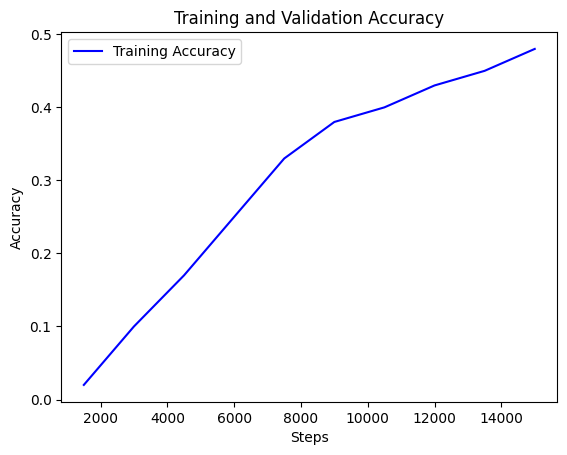

In [5]:
import matplotlib.pyplot as plt

# Example data
steps = [1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000]  # Epoch numbers
acc = [0.02, 0.10, 0.17, 0.25, 0.33, 0.38, 0.40, 0.43, 0.45, 0.48]  # Training accuracy values

# Plotting
plt.plot(steps, acc, 'b', label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Download the BLEU script
!wget https://raw.githubusercontent.com/ymoslem/MT-Evaluation/main/BLEU/compute-bleu.py

In [ ]:
# Install sacrebleu
!pip3 install sacrebleu

In [ ]:
# Desubword the translation test
!python3 MT-Preparation/subwording/3-desubword.py target.model /content/WikiMatrix.es-it.it-filtered.it.subword.test

In [ ]:
# Desubword the translation test
!python3 MT-Preparation/subwording/3-desubword.py source.model /content/WikiMatrix.es-it.es-filtered.es.subword.test

In [ ]:
# Evaluate the translation from spanish to italian (without subwording)
!python3 compute-bleu.py /content/WikiMatrix.es-it.it-filtered.it.subword.test.desubword /content/translated.it.desubword

In [ ]:
# Evaluate the translation from italian to spanish (without subwording)
!python3 compute-bleu.py /content/WikiMatrix.es-it.es-filtered.es.subword.test.desubword /content/translated.es.desubword

## **Recognise language**

In [ ]:
!pip install fasttext-langdetect

In [ ]:
from ftlangdetect import detect

custom_input = input()
f = open("/content/custom.txt", "w")
f.write(custom_input)
f.close()

result = detect(text=custom_input, low_memory=False)
print(result)

if result["lang"] == "it":
  print("run italian to spanish")
  os.system("python3 MT-Preparation/subwording/2-subword.py source.model target.model /content/custom.txt /content/fake.txt")
  os.system("onmt_translate -model models/model.ites_step_12500.pt -src /content/custom.txt.subword -output /content/custom.txt.it-sub -gpu 0 -min_length 1")
  os.system("python3 MT-Preparation/subwording/3-desubword.py source.model /content/custom.txt.it-sub")
  os.system("head -n 5 /content/custom.txt.it-sub.desubword")
  f = open("/content/custom.txt.it-sub.desubword", "r")
  for line in f:
    print(line)
elif result["lang"] == "es":
  print("run spanish to italian")
  os.system("python3 MT-Preparation/subwording/2-subword.py source.model target.model /content/custom.txt /content/fake.txt")
  os.system("onmt_translate -model models/model.esit_step_10000.pt -src /content/custom.txt.subword -output /content/custom.txt.it-sub -gpu 0 -min_length 1")
  os.system("python3 MT-Preparation/subwording/3-desubword.py target.model /content/custom.txt.it-sub")
  os.system("head -n 5 /content/custom.txt.it-sub.desubword")
  f = open("/content/custom.txt.it-sub.desubword", "r")
  for line in f:
    print(line)
else:
  print("language not supported")
